In [2]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [3]:
# importing the data set
df = pd.read_csv('winequality-white.csv')

## Exploratory Data Analysis

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


###Data Summarization

In [ ]:
df.shape

(4898, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


###Data Profiling

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

###Data Visualisation

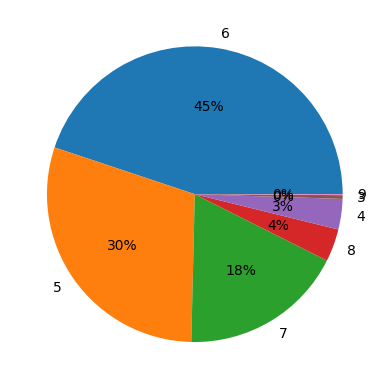

In [ ]:
# Pie chart for percentage of different qualities of wine
plt.pie(df['quality'].value_counts(), labels=df['quality'].unique(), autopct='%.0f%%')
plt.show()

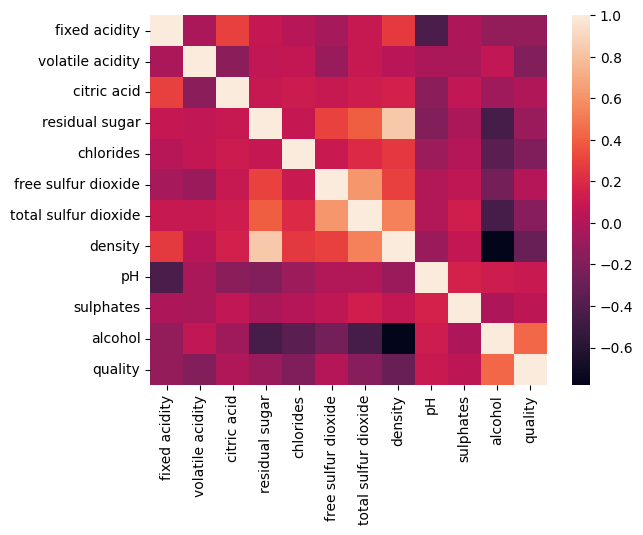

In [ ]:
# heatmap for correlation
sns.heatmap(df.corr(), color='k')
plt.show()

In [ ]:
# get the top three highest correlated properties with density
abs(df.corr()['density']).sort_values(ascending=False)

,density
density,1.000000
residual sugar,0.838966
alcohol,0.780138
total sulfur dioxide,0.529881
quality,0.307123
free sulfur dioxide,0.294210
fixed acidity,0.265331
chlorides,0.257211
citric acid,0.149503
pH,0.093591


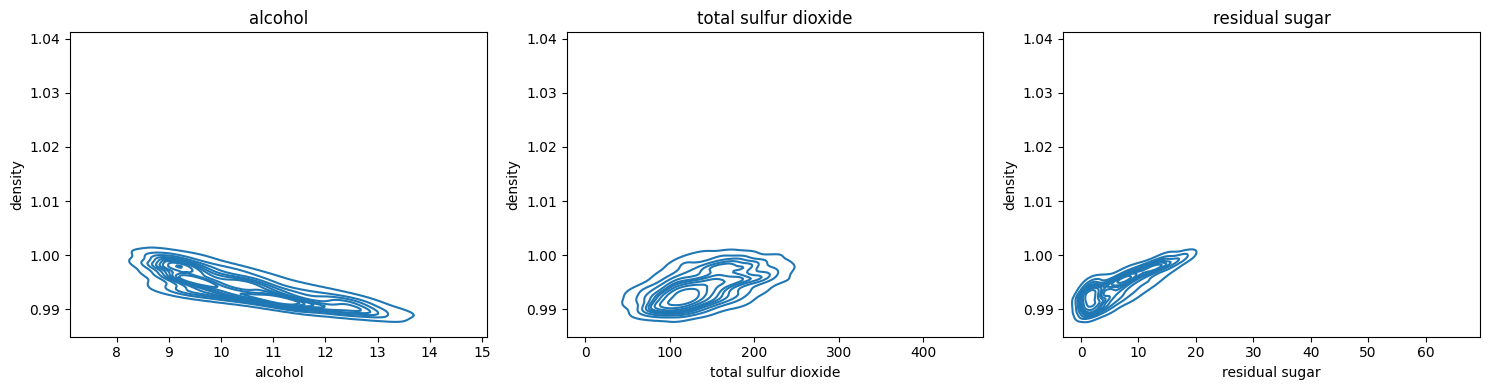

In [ ]:
# plot these top three highest correlated properties with density
cols = ['alcohol', 'total sulfur dioxide', 'residual sugar']

fig, axes = plt.subplots(nrows =1, ncols =3, figsize= (15, 4))
axes = axes.flatten()
for i, column in enumerate(cols):
    sns.kdeplot(data=df, x=column, y='density', ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

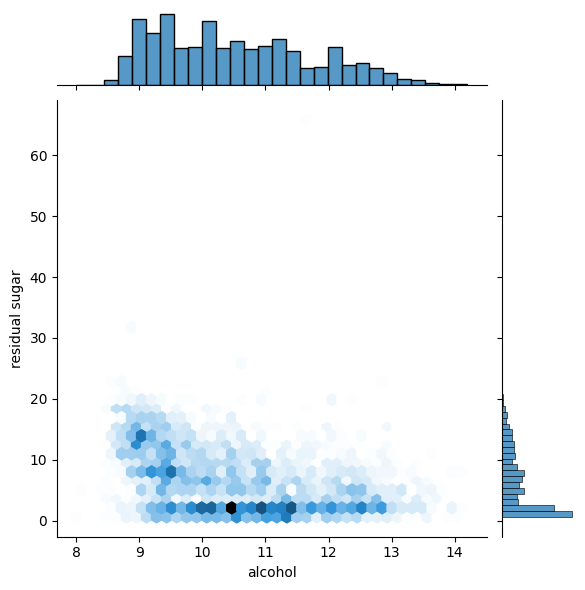

In [22]:
# residual sugar vs alcohol
sns.jointplot(data=df, x='alcohol', y='residual sugar', kind='hex')
plt.show()

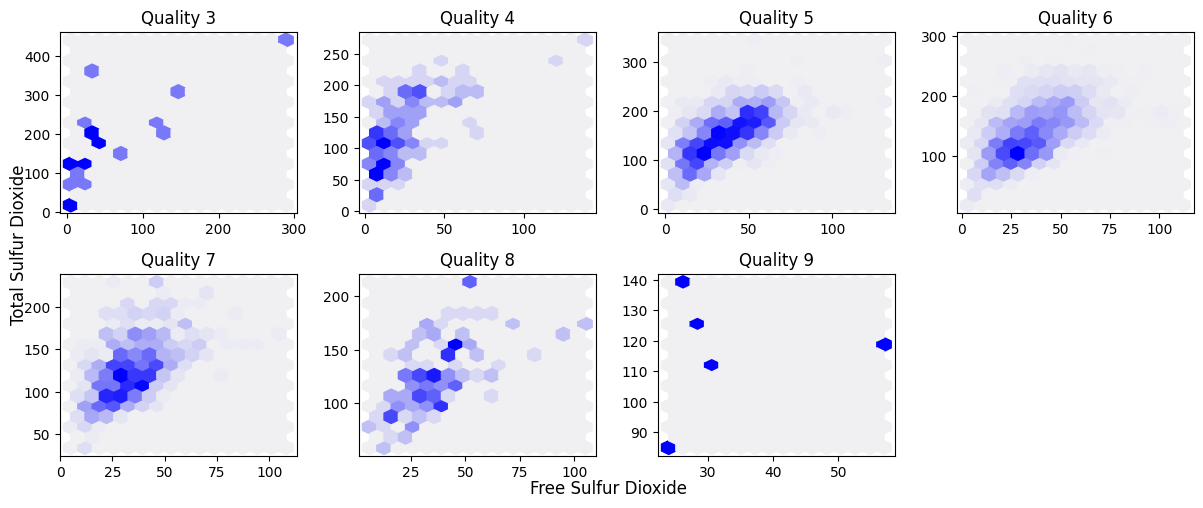

In [85]:
# plotting relationship between free and total sulfur dioxide
cols = sorted(df.quality.unique())

fig, axes = plt.subplots(nrows =2, ncols =4, figsize= (12, 5))
axes = axes.flatten()
cmap = sns.light_palette('blue', as_cmap=True)

for i, column in enumerate(cols):
    axes[i].hexbin(x=df[df['quality']==column]['free sulfur dioxide'], y=df[df['quality']==column]['total sulfur dioxide'],
                         gridsize=15, cmap=cmap)
    axes[i].set_title(f"Quality {column}")

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

fig.text(0.5, 0.001, 'Free Sulfur Dioxide', ha='center', fontsize=12)  # Global x-axis label
fig.text(0.001, 0.5, 'Total Sulfur Dioxide', va='center', rotation='vertical', fontsize=12)  # Global y-axis label

plt.tight_layout()
plt.show()


##Data Preprocessing

###Handling Outliers

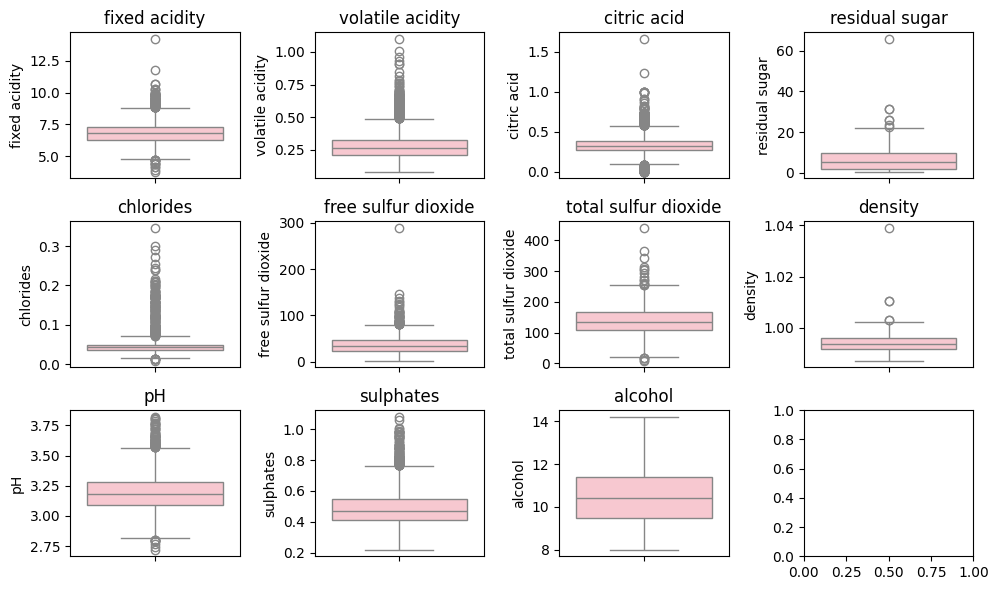

In [86]:
# finding the properties with outliers
cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows =3, ncols =4, figsize= (10, 6))
axes = axes.flatten()
for i, column in enumerate(cols):
    sns.boxplot(df[column], ax=axes[i], color='pink')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [88]:
# Columns to check for outliers (excluding 'quality' and 'alcohol')
columns = df.columns.drop(['quality', 'alcohol'])

# Remove outliers
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

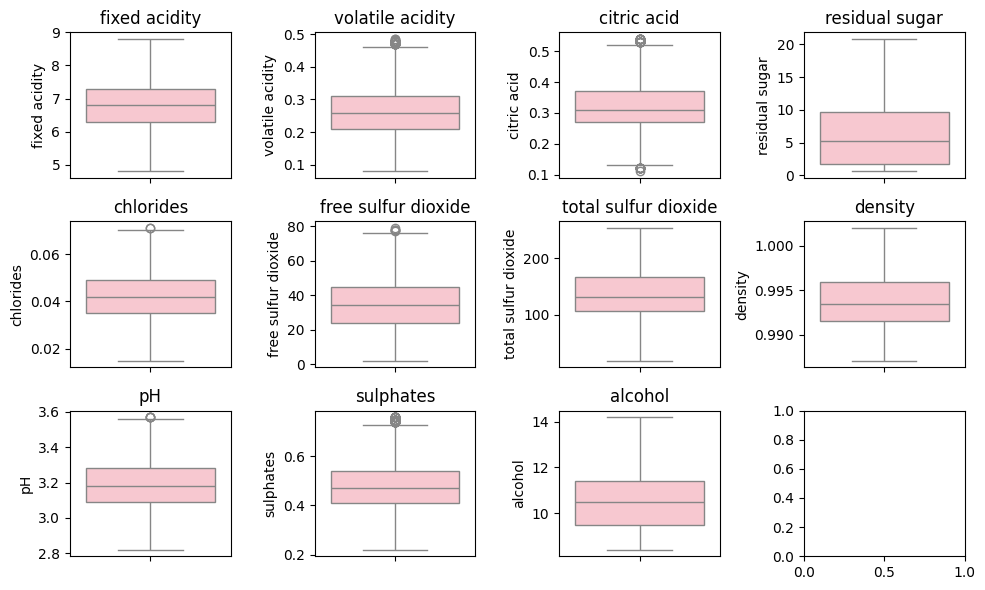

In [101]:
# plot boxplots after removing outliers
cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows =3, ncols =4, figsize= (10, 6))
axes = axes.flatten()
for i, column in enumerate(cols):
    sns.boxplot(df[column], ax=axes[i], color='pink')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

###Adding the quality category

In [91]:
# set the 'good quality' column to 0 if quality < 7 and to 1 if quality >=7
df['good quality'] = (df['quality'] >= 7).astype(int)

In [99]:
df['good quality'].value_counts()

,count
good quality,
0,3031
1,942


###Data Splitting

In [102]:
# assigning X and y properties
X = df.drop(['quality', 'good quality'], axis=1)
y = df['good quality']

In [103]:
# splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Data Standarization

In [104]:
# standarizing the data for better results
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

##Machine Learning models

###SVM

In [105]:
svm_model = SVC(probability = True)
svm_model = svm_model.fit(X_train, y_train)

In [140]:
y_pred = svm_model.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       615
           1       0.73      0.41      0.52       180

    accuracy                           0.83       795
   macro avg       0.79      0.68      0.71       795
weighted avg       0.82      0.83      0.81       795



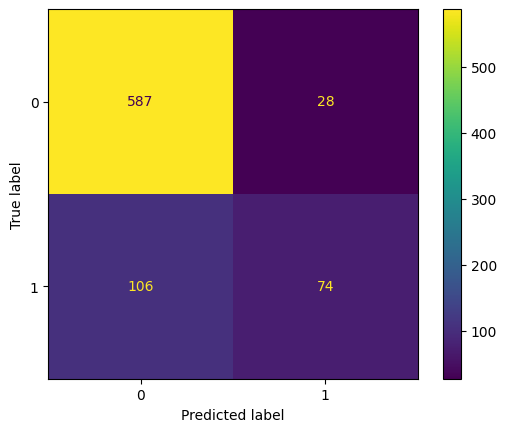

In [107]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)

In [122]:
# Summary table to store all the stats
summary_table = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-score', 'Precision', 'AUC'])

In [141]:
report = classification_report(y_test, y_pred, output_dict=True)
fpr, tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
summary_table.loc[0] = ['SVM', report['accuracy'], report['macro avg']['f1-score'], report['macro avg']['precision'], auc(fpr, tpr)]

###Naive Bayes

In [135]:
naive_model = GaussianNB()
naive_model = naive_model.fit(X_train, y_train)

In [142]:
y_pred = naive_model.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       615
           1       0.43      0.59      0.50       180

    accuracy                           0.73       795
   macro avg       0.65      0.68      0.66       795
weighted avg       0.77      0.73      0.75       795



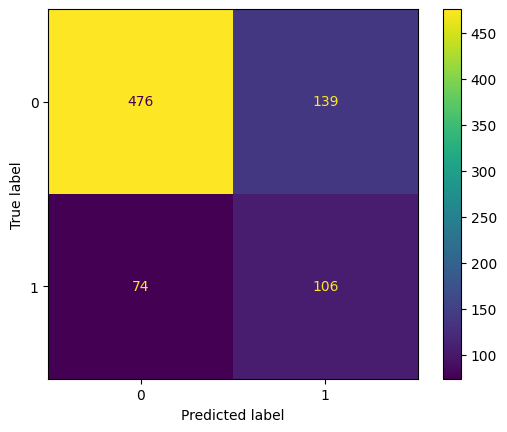

In [137]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(naive_model, X_test, y_test)

In [143]:
report = classification_report(y_test, y_pred, output_dict=True)
fpr, tpr, _ = roc_curve(y_test, naive_model.predict_proba(X_test)[:, 1])
summary_table.loc[1] = ['Naive Bayes', report['accuracy'], report['macro avg']['f1-score'], report['macro avg']['precision'], auc(fpr, tpr)]

###KNN

In [145]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model = knn_model.fit(X_train, y_train)

In [146]:
y_pred = knn_model.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       615
           1       0.64      0.71      0.67       180

    accuracy                           0.84       795
   macro avg       0.77      0.80      0.78       795
weighted avg       0.85      0.84      0.85       795



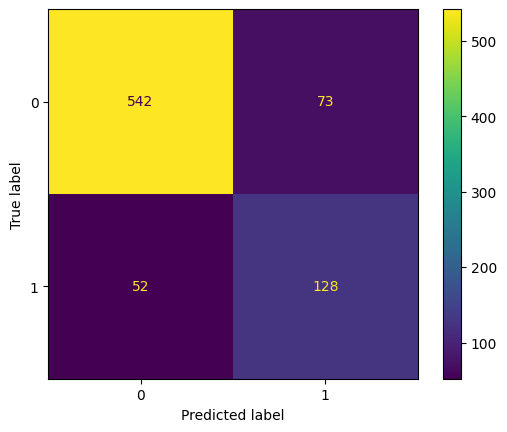

In [147]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)

In [148]:
report = classification_report(y_test, y_pred, output_dict=True)
fpr, tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
summary_table.loc[2] = ['KNN', report['accuracy'], report['macro avg']['f1-score'], report['macro avg']['precision'], auc(fpr, tpr)]

###Logistic Regression

In [150]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)

In [151]:
y_pred = log_model.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       615
           1       0.53      0.26      0.35       180

    accuracy                           0.78       795
   macro avg       0.67      0.60      0.61       795
weighted avg       0.75      0.78      0.75       795



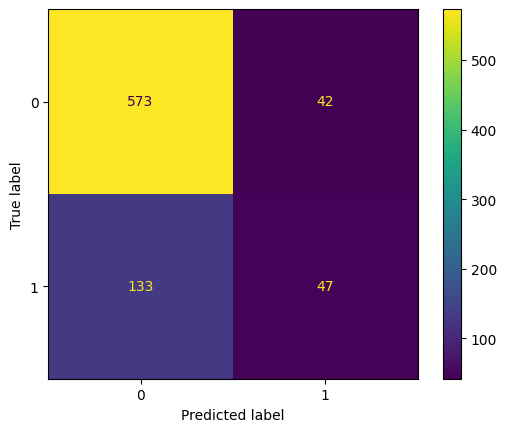

In [152]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)

In [153]:
report = classification_report(y_test, y_pred, output_dict=True)
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
summary_table.loc[3] = ['Logistic Regression', report['accuracy'], report['macro avg']['f1-score'], report['macro avg']['precision'], auc(fpr, tpr)]

###Cross Validation

In [160]:
models = {
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}
results = []

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append(scores.mean())

In [162]:
summary_table['Cross-Validation'] = results

##Summary

In [163]:
summary_table = summary_table.round(2)

In [164]:
print(summary_table)

                 Model  Accuracy  F1-score  Precision   AUC  Cross-Validation
0                  SVM      0.83      0.71       0.79  0.86              0.80
1          Naive Bayes      0.73      0.66       0.65  0.73              0.74
2                  KNN      0.84      0.78       0.77  0.80              0.80
3  Logistic Regression      0.78      0.61       0.67  0.75              0.78
